In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("concat_data.csv",low_memory =False)

In [9]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [10]:
df.head()

,기준일자,기준시간대값,시군구명,행정동명,카드사명,업종명,출생년도,성별코드,거래건수,총거래금액,age,age_range,요일
0,2022-06-01,0,중구,대청동,코나,편 의 점,1973,M,1,7350,50,50,Wednesday
1,2022-06-01,0,중구,중앙동,부산,편 의 점,1981,F,1,3700,42,40,Wednesday
2,2022-06-01,0,중구,중앙동,부산,편 의 점,1992,M,1,7500,31,30,Wednesday
3,2022-06-01,0,중구,중앙동,부산,편 의 점,1995,M,1,2700,28,20,Wednesday
4,2022-06-01,0,중구,중앙동,코나,편 의 점,1976,M,1,13900,47,40,Wednesday


In [11]:
# 거래 합산 평균 금액
df['건별거래금액'] = df['총거래금액']/df['거래건수']
df.tail()

,기준일자,기준시간대값,시군구명,행정동명,카드사명,업종명,출생년도,성별코드,거래건수,총거래금액,age,age_range,요일,건별거래금액
27135014,2022-08-01,0,영도구,동삼1동,코나,슈퍼마켓,1958,M,1,30000,65,60,Monday,30000.0
27135015,2022-08-01,0,영도구,동삼1동,코나,주점,1998,M,1,59600,25,20,Monday,59600.0
27135016,2022-08-01,0,영도구,동삼1동,코나,기타음료식품,1998,F,1,7500,25,20,Monday,7500.0
27135017,2022-08-01,0,영도구,동삼1동,하나,편 의 점,1971,F,2,7600,52,50,Monday,3800.0
27135018,2022-08-01,0,영도구,동삼1동,하나,편 의 점,2001,M,1,2200,22,20,Monday,2200.0


In [32]:
# 요일별 거래 건수 합계
sum_of_day = df.groupby('요일')['거래건수'].agg(**{'요일별거래건수':'sum'})

In [33]:
sum_of_day

,요일별거래건수
요일,
Friday,4737182
Monday,4059014
Saturday,4599114
Sunday,3399245
Thursday,4395764
Tuesday,4142827
Wednesday,4593596


In [36]:
# x축 라벨 순서 변경
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sum_of_day = sum_of_day.loc[weekday_order]

<Axes: xlabel='요일', ylabel='요일별거래건수'>

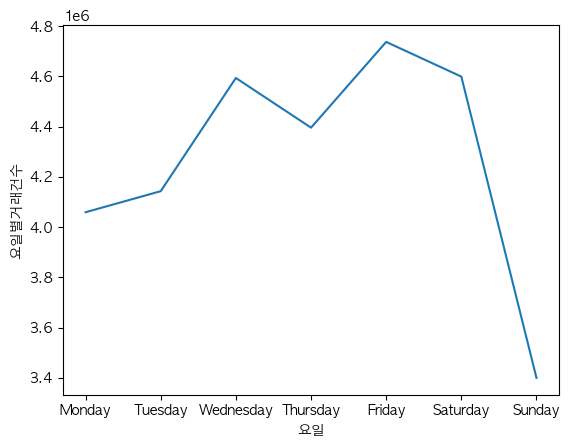

In [37]:
from matplotlib import rc
#맥북용
rc('font', family='AppleGothic') ## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 
sns.lineplot(data=sum_of_day, x = '요일', y = '요일별거래건수')

In [42]:
spend_of_day = df.groupby('요일')['총거래금액'].agg(**{'요일별거래총액':'sum'})
spend_of_day

,요일별거래총액
요일,
Friday,99890486430
Monday,79660974022
Saturday,100364835015
Sunday,65716403011
Thursday,88046141758
Tuesday,82288952833
Wednesday,91091221969


In [43]:
spend_of_day = spend_of_day.loc[weekday_order]

<Axes: xlabel='요일', ylabel='요일별거래총액'>

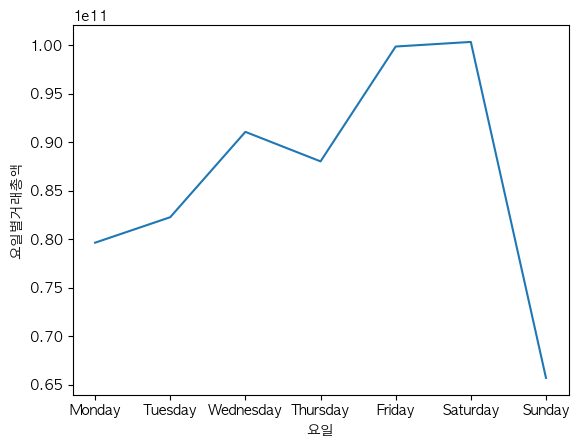

In [44]:
sns.lineplot(data=spend_of_day, x = '요일', y = '요일별거래총액')

### 일요일 총 거래건수 최하, 거래 금액 최하 -> 많이 쓰는 날은 의외로 평일. 금토

In [ ]:
# 최다 방문 업종, 최대 구매 업종

In [61]:
s_grouped = df.groupby('업종명')
store_visit = s_grouped['거래건수'].agg(**{'업종별방문수':'sum'})
store_visit

,업종별방문수
업종명,
1급 호텔,1078
2급 호텔,1097
DP&E,18901
DVD음반테이프 판매,1241
GS 가스충전소,10522
...,...
화랑,1525
화물운송,1497
화방표구점,527


In [62]:
# 사람들이 많이 방문하는 업종명은 편의점, 서양음식, 일반한식, 슈퍼마켓
store_visit.sort_values(by = ['업종별방문수'], ascending = False).head(10)

,업종별방문수
업종명,
편 의 점,4741861
서양음식,4711711
일반한식,4108519
슈퍼마켓,3676607
약국,1400612
스넥,1221040
기타음료식품,1061501
제과점,936430
의원,931731


In [64]:
# 지역화폐 매출이 많은 업종은 일반한식>슈퍼마켓>서양음식>편의점>의원.
store_sum = s_grouped['총거래금액'].agg(**{'업종별총거래금액':'sum'})
store_sum.sort_values(by = ['업종별총거래금액'], ascending = False).head(10)

,업종별총거래금액
업종명,
일반한식,126341864704
슈퍼마켓,44751636764
서양음식,37458268110
편 의 점,31165442011
의원,26531713216
보습학원,23222737763
약국,20461505671
스넥,17303185187
농축수산품,15481140384


In [65]:
# 평균 결제 금액이 높은 업종?
store_mean = s_grouped['총거래금액'].agg(**{'업종별총거래금액':'mean'})
store_mean.sort_values(by = ['업종별총거래금액'], ascending = False).head(10)

,업종별총거래금액
업종명,
초중고교육기관,397958.333333
유치원,392034.862385
유학원,357941.715728
산후조리원,351432.158568
냉열기기,310104.154846
보습학원,283917.374905
일반가구,282128.947693
외국어학원,279178.156159
학원,256352.693617


In [ ]:
# 의외로!! 교육 기관이 건 별 구매 금액이 높은 경향이 있다.

In [74]:
# 거래 시간 별 많이 방문한 업종
time_store = df.groupby(['기준시간대값', '업종명'])['거래건수'].agg(**{'거래시간별업종방문수':'sum'})
time_store

거래시간별업종방문수
기준시간대값 업종명                   
0      2급 호텔               11
       DP&E               138
       GS 가스충전소            50
       GS주유소              697
       SK가스충전소            421
...                       ...
23     헬스클럽               229
       현대정유(오일뱅크)        1069
       홍삼제품                 3
       화원                   9
       화장품                 43

[3780 rows x 1 columns]

In [78]:
time_store.max()

거래시간별업종방문수    676425
dtype: int64